In [1]:
from pathlib import Path
import numpy as np
import shutil
import math

In [ ]:
# dataset = Path('E:/HandsOnPython/Datasets/dataset2')
# root = Path('E:\HandsOnPython\Datasets\YOLO_CLS_WEATHER')
# Path(root/'weather'/'train'/'rain').mkdir(parents=True, exist_ok=True)
# Path(root/'weather'/'train'/'sunrise').mkdir(parents=True, exist_ok=True)
# Path(root/'weather'/'train'/'shine').mkdir(parents=True, exist_ok=True)
# Path(root/'weather'/'train'/'cloudy').mkdir(parents=True, exist_ok=True)

# Path(root/'weather'/'val'/'rain').mkdir(parents=True, exist_ok=True)
# Path(root/'weather'/'val'/'sunrise').mkdir(parents=True, exist_ok=True)
# Path(root/'weather'/'val'/'shine').mkdir(parents=True, exist_ok=True)
# Path(root/'weather'/'val'/'cloudy').mkdir(parents=True, exist_ok=True)

# Path(root/'weatherSplit').mkdir(parents=True, exist_ok=True)
# Path(root/'weatherSplit'/'rain').mkdir(parents=True, exist_ok=True)
# Path(root/'weatherSplit'/'sunrise').mkdir(parents=True, exist_ok=True)
# Path(root/'weatherSplit'/'shine').mkdir(parents=True, exist_ok=True)
# Path(root/'weatherSplit'/'cloudy').mkdir(parents=True, exist_ok=True)

Separando as classes

In [ ]:
# for img in dataset.rglob('*'):
   
#     name = img.name.split('.')[0]

#     if('cloudy' in name):
#         shutil.copy(img,Path().resolve()/'weatherSplit'/'cloudy')
#         continue

#     if('rain' in name):
#         shutil.copy(img,Path().resolve()/'weatherSplit'/'rain')
#         continue

#     if('shine' in name):
#         shutil.copy(img,Path().resolve()/'weatherSplit'/'shine')
#         continue

#     if('sunrise' in name):
#         shutil.copy(img,Path().resolve()/'weatherSplit'/'sunrise')
#         continue



In [ ]:
# rain = list((Path().resolve()/'weatherSplit'/'rain').rglob('*'))
# sunrise = list((Path().resolve()/'weatherSplit'/'sunrise').rglob('*'))
# shine = list((Path().resolve()/'weatherSplit'/'shine').rglob('*'))
# cloudy = list((Path().resolve()/'weatherSplit'/'cloudy').rglob('*'))

In [ ]:
# climas = {
#     'rain': rain,
#     'shine': shine,
#     'sunrise': sunrise,
#     'cloudy':cloudy
# }
# #
# for key, value in climas.items():
    
#     tamanho = len(value)
#     idx_shuffle = np.random.permutation(tamanho)
#     corte = tamanho//5 #20% dos dados
    
#     val = idx_shuffle[:corte]
#     train = idx_shuffle[corte:]

#     for idx in val:
#         shutil.copy(value[idx], Path().resolve()/'weather'/'val'/key)

#     for idx in train:
#         shutil.copy(value[idx], Path().resolve()/'weather'/'train'/key)


In [2]:
from ultralytics import YOLO

model = YOLO("yolov8n-cls.pt")  # load a pretrained model (recommended for training)

In [4]:
#Verificou-se que algumas imagens estavam em formato invalido shine 131 e rain 141
model.train(data="E:\HandsOnPython\Datasets\YOLO_CLS_WEATHER\weather", epochs=20, imgsz=64)

Ultralytics YOLOv8.0.58  Python-3.11.1 torch-2.1.2+cpu CPU
yolo\engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=E:\HandsOnPython\Datasets\YOLO_CLS_WEATHER\weather, epochs=20, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [54]:
results_path = Path(r'E:\HandsOnPython\Capitulo 1 - Preço de Casas\ProcessamentoDeImagens\YOLO8_ClSeFeatures\runs\classify\train3\results.csv')

results_df = pd.read_csv(results_path)
results_df.head(5)

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.31730,0.51339,1,1.10430,0.070526,0.003275,0.003275
1,1,0.19544,0.72321,1,0.93643,0.040199,0.006281,0.006281
2,2,0.15509,0.70982,1,0.94051,0.009542,0.008957,0.008957
3,3,0.12918,0.79018,1,0.84244,0.008515,0.008515,0.008515
4,4,0.11334,0.80804,1,0.84746,0.008515,0.008515,0.008515


In [55]:
novas_colunas = {col:str(col).split()[0] for col in results_df.columns}
results_df = results_df.rename(columns=novas_colunas)

In [59]:
results_df

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.31730,0.51339,1,1.10430,0.070526,0.003275,0.003275
1,1,0.19544,0.72321,1,0.93643,0.040199,0.006281,0.006281
2,2,0.15509,0.70982,1,0.94051,0.009542,0.008957,0.008957
3,3,0.12918,0.79018,1,0.84244,0.008515,0.008515,0.008515
4,4,0.11334,0.80804,1,0.84746,0.008515,0.008515,0.008515
5,5,0.08635,0.81250,1,0.84065,0.008020,0.008020,0.008020
6,6,0.06935,0.83482,1,0.80990,0.007525,0.007525,0.007525
7,7,0.05118,0.83036,1,0.80154,0.007030,0.007030,0.007030
8,8,0.04656,0.90625,1,0.75981,0.006535,0.006535,0.006535
9,9,0.03623,0.90179,1,0.75160,0.006040,0.006040,0.006040


In [62]:
epochs = (results_df['epoch']).__array__()
loss_train = (results_df['train/loss']).__array__()
loss_val = (results_df['val/loss']).__array__()
accuracia = (results_df['metrics/accuracy_top1']).__array__()

In [67]:
loss_val

array([     1.1043,     0.93643,     0.94051,     0.84244,     0.84746,     0.84065,      0.8099,     0.80154,     0.75981,      0.7516,     0.75223,     0.73889,     0.82363,     0.75548,     0.74131,     0.81485,     0.73522,      0.7228,     0.72654,     0.72469])

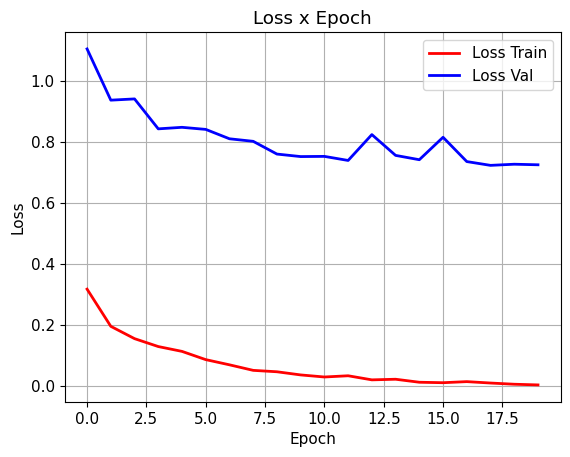

In [127]:
# %matplotlib inline
plt.plot(epochs,loss_train, 'r-', linewidth=2, label='Loss Train')
plt.plot(epochs,loss_val, 'b-', linewidth=2, label='Loss Val')
plt.grid(True)
plt.legend()
plt.title('Loss x Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [3]:
#Escolhendo o ultimo modelo da ultima epoca
model_predict = YOLO(r'E:\HandsOnPython\Capitulo 1 - Preço de Casas\ProcessamentoDeImagens\YOLO8_ClSeFeatures\runs\classify\train3\weights\last.pt')

In [4]:
img = r"E:\HandsOnPython\Datasets\YOLO_CLS_WEATHER\weather\train\rain\rain8.jpg"
results = model_predict(img)


image 1/1 E:\HandsOnPython\Datasets\YOLO_CLS_WEATHER\weather\train\rain\rain8.jpg: 64x64 rain 1.00, cloudy 0.00, shine 0.00, sunrise 0.00, 61.5ms
Speed: 1.0ms preprocess, 61.5ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


In [5]:
import cv2
import numpy as np

# obter índice da classe e confiança
probs = np.array(results[0].probs.tolist())
index = probs.argmax()
conf = probs.max()
classe = results[0].names[index]

# garantir que o caminho está correto
img_path = str(img)

# carregar imagem
img_cv = cv2.imread(img_path)

# verificar se a imagem foi carregada
if img_cv is None:
    raise ValueError(f"Erro ao carregar a imagem: {img_path}")

# escreve label na imagem
text = f"{classe} {conf:.2f}"
cv2.putText(img_cv, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
            1, (0, 255, 0), 2, cv2.LINE_AA)

# exibir imagem
cv2.imshow("Output", img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()
